In [1]:
#tabular data imports :
import pandas as pd
import numpy as np
from pydataset import data

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
# Custom palette with specified colors
custom_palette = sns.color_palette(["#33B8C6", "#C64133", "#4682B4"])
# Using a matplotlib colormap
custom_palette2 = sns.color_palette(["#33B8C6","#50C2CE","#6DCCD6","#8AD6DE","#A7E0E6","#C4EAEE","#E1F4F6"])

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

#stats
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import explore as e
import os
directory = os.getcwd()
pd.set_option('display.max_columns', None)

In [2]:
# Calling the function that combines all the steps before and creates a .csv file from the df (to run faster and locally)
df = w.prepare_wine(w.red_wine_url, w.white_wine_url)
df.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1                7.0              0.27         0.36            20.7   
w-2                6.3              0.30         0.34             1.6   
w-3                8.1              0.28         0.40             6.9   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
w-1          0.045                 45.0                 170.0   1.0010  3.00   
w-2          0.049                 14.0                 132.0   0.9940  3.30   
w-3          0.050                 30.0                  97.0   0.9951  3.26   

         sulphates  alcohol  quality  color wine_quality  
wine_id                                                   
w-1           0.45      8.8        6  white      average  
w-2           0.49      9.5        6  white      average  
w-3           0.44     10.1        6  white      average

# EXPLORATION:
## UNIVARIATE

In [3]:
e.summarize(df)

--------------------------------
--------------------------------
Information on DataFrame: 
Shape of Dataframe: (6497, 14)
--------------------------------
Basic DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, w-1 to r-1599
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 

In [4]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'wine_quality'],
      dtype='object')

In [5]:
cols = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',\
        'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates',\
        'alcohol','quality','color','wine_quality']

### Q1. What is the distribution of each variable?
#### Since I'm doing at univariate exploration, I can use the original dataset.

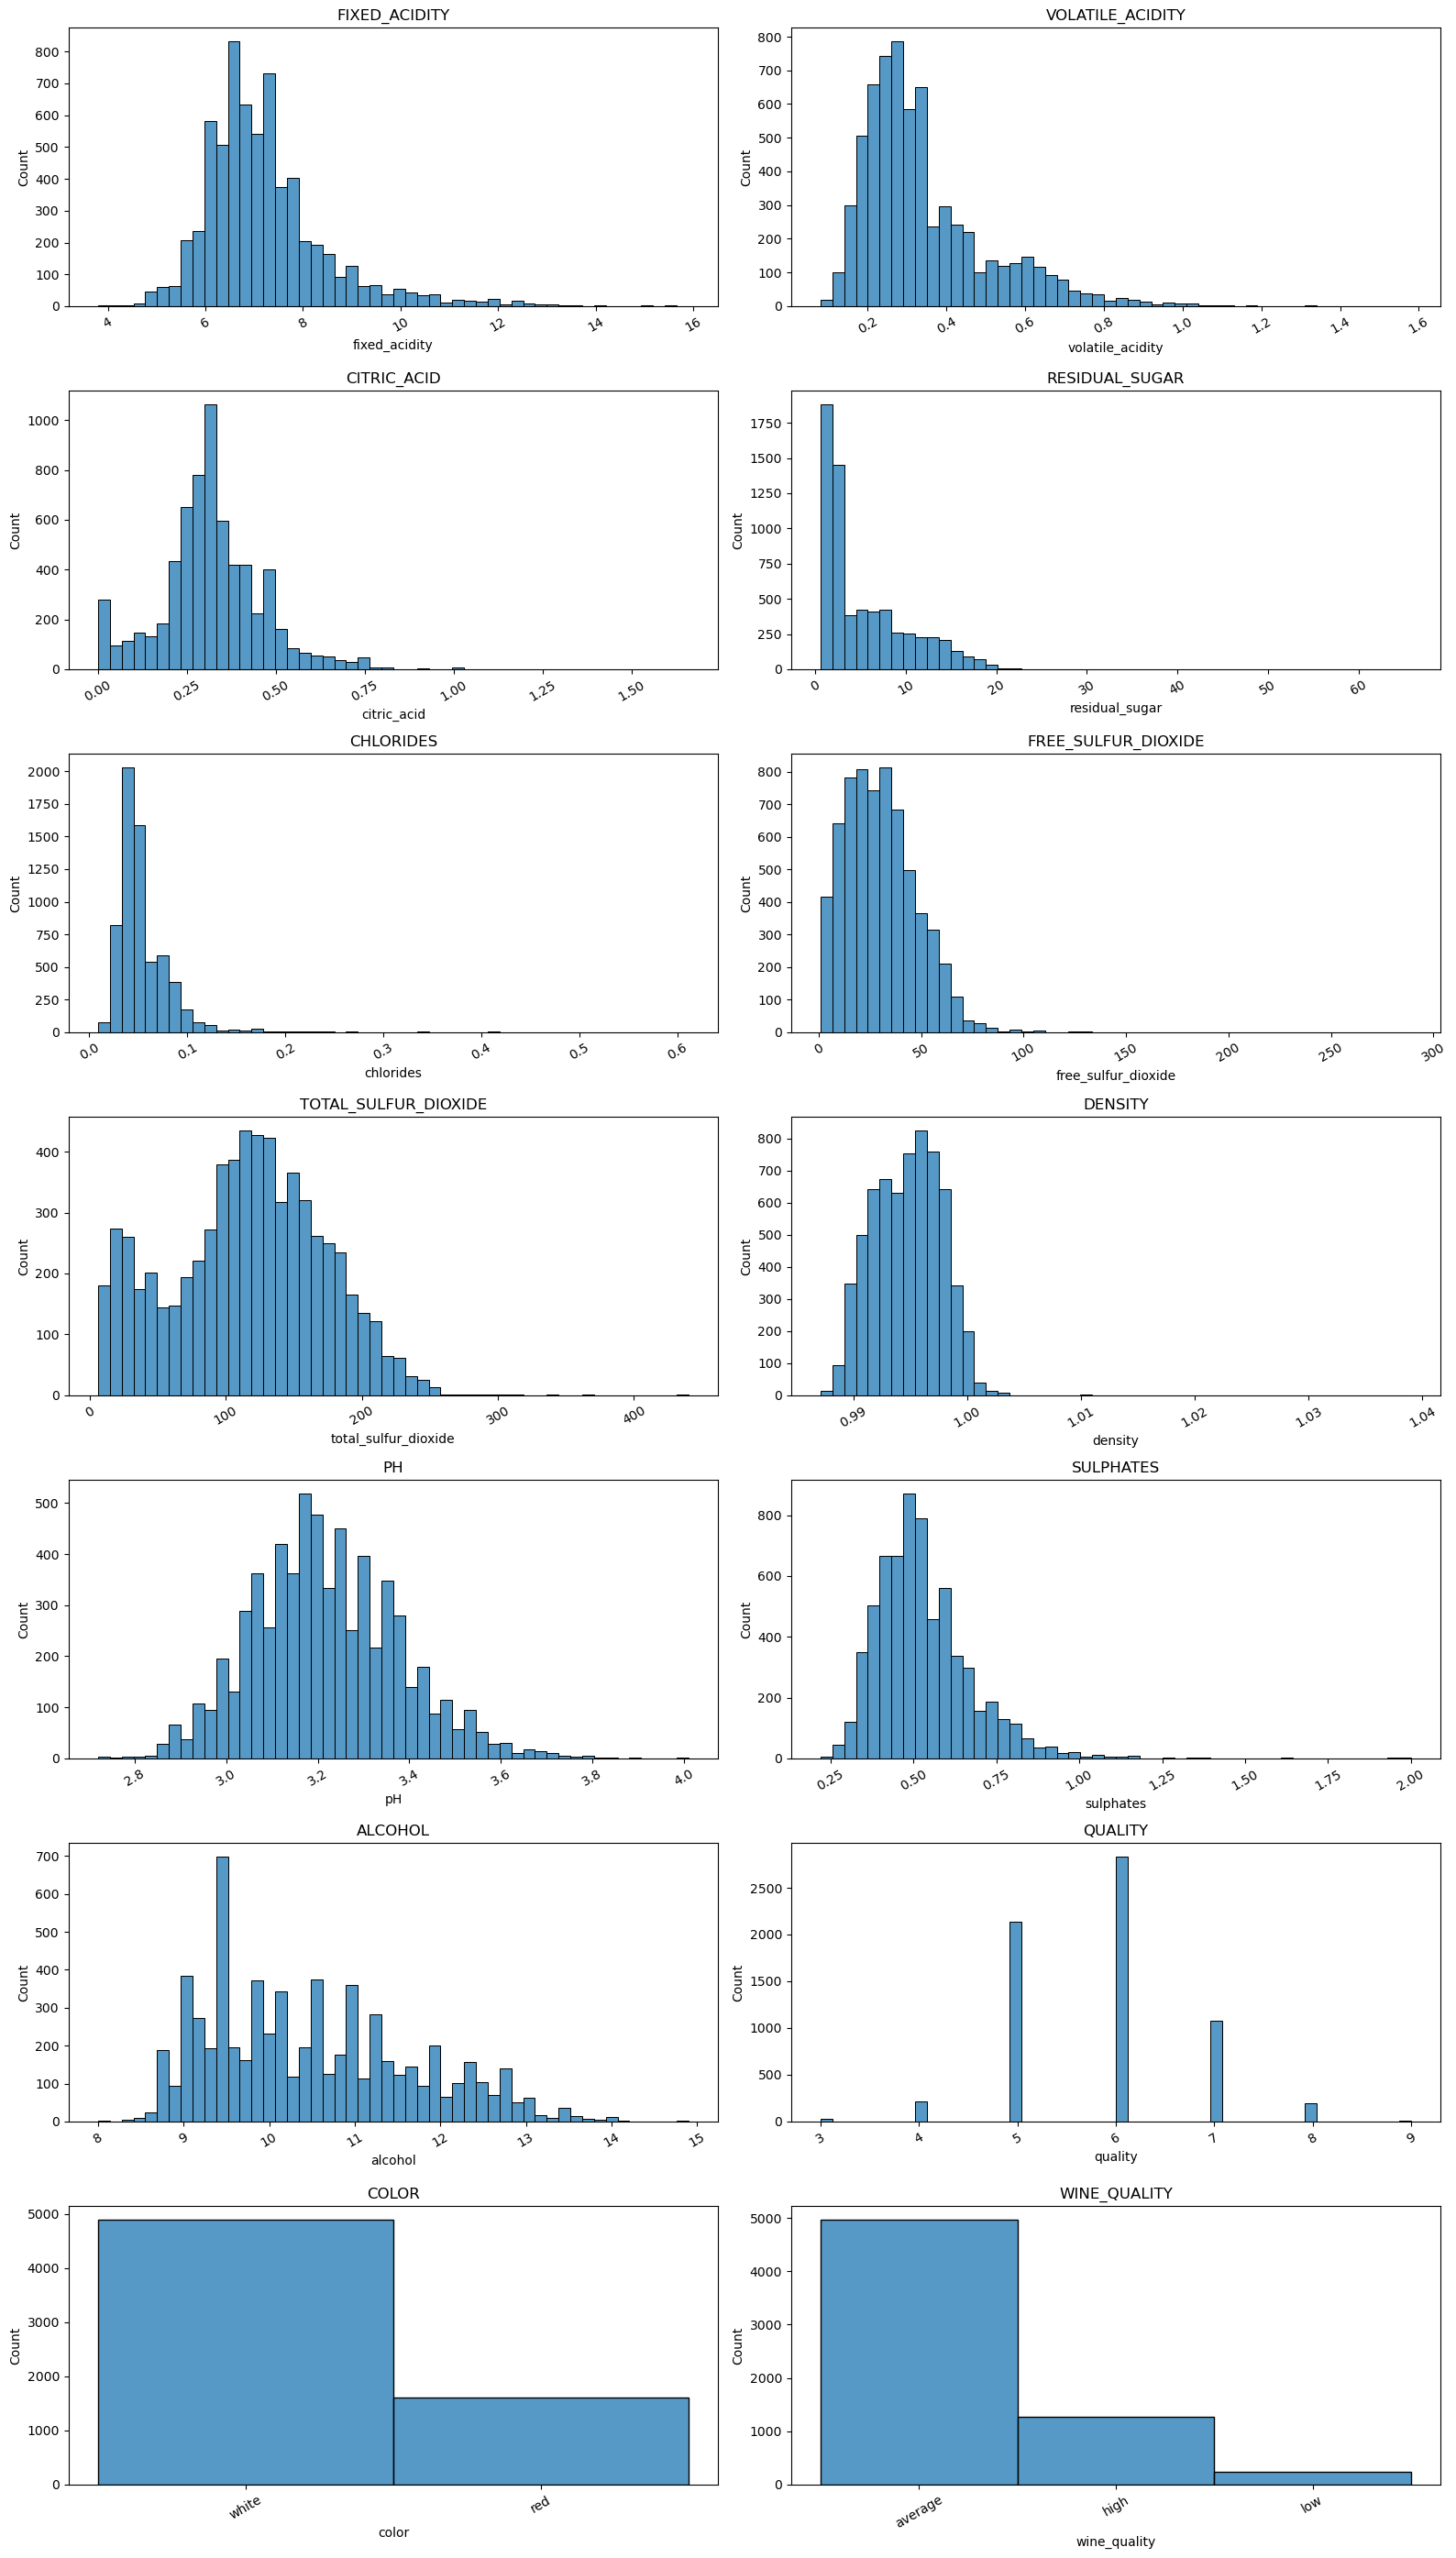

In [6]:
# Determine the number of rows needed for subplots
n_rows = len(cols) // 2 + len(cols) % 2
fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows*4))

for i, col in enumerate(cols):
    ax = axes.flatten()[i]
    sns.histplot(df[col], bins=50, ax=ax)  # Using seaborn for a more refined look
    ax.set_title(col.upper(), fontsize=12)  # Set title for each subplot
    ax.tick_params(axis='x', rotation=30)   # Rotate x-axis labels
    ax.grid(False)  # Hide gridlines

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [7]:
# comparing the numbers of wine
pd.crosstab(df.color, df.wine_quality)

wine_quality  average  high  low
color                           
red              1319   217   63
white            3655  1060  183

## BIVARIATE

In [8]:
# split data
train, validate, test = e.split_data(df)


    train -> (3898, 14)
    validate -> (1299, 14)
    test -> (1300, 14)


In [9]:
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-2549             6.3              0.26         0.42             7.1   
w-4295             7.4              0.22         0.28             9.0   
r-956              8.5              0.21         0.52             1.9   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
w-2549       0.045                 62.0                 209.0  0.99544  3.20   
w-4295       0.046                 22.0                 121.0  0.99468  3.10   
r-956        0.090                  9.0                  23.0  0.99648  3.36   

         sulphates  alcohol  quality  color wine_quality  
wine_id                                                   
w-2549        0.53      9.5        6  white      average  
w-4295        0.55     10.8        5  white      average  
r-956         0.67     10.4        5    red      average

In [10]:
# Figuring out how many unique values each column has
for col in cols:
    unique_count = df[col].nunique()
    print(f'# of uniques in {col}: {unique_count}')

# of uniques in fixed_acidity: 106
# of uniques in volatile_acidity: 187
# of uniques in citric_acid: 89
# of uniques in residual_sugar: 316
# of uniques in chlorides: 214
# of uniques in free_sulfur_dioxide: 135
# of uniques in total_sulfur_dioxide: 276
# of uniques in density: 998
# of uniques in pH: 108
# of uniques in sulphates: 111
# of uniques in alcohol: 111
# of uniques in quality: 7
# of uniques in color: 2
# of uniques in wine_quality: 3


# pairplot with hue of quality_category
sns.pairplot(data=train, corner=True, hue='wine_quality', palette=custom_palette, plot_kws={'alpha': 1})
plt.show()

# pairplot with hue of color
sns.pairplot(data=train, corner=True, hue='color', palette=custom_palette)
plt.show()

# pairplot with hue of quality
sns.pairplot(data=train, corner=True, hue='quality', palette='viridis')
plt.show()

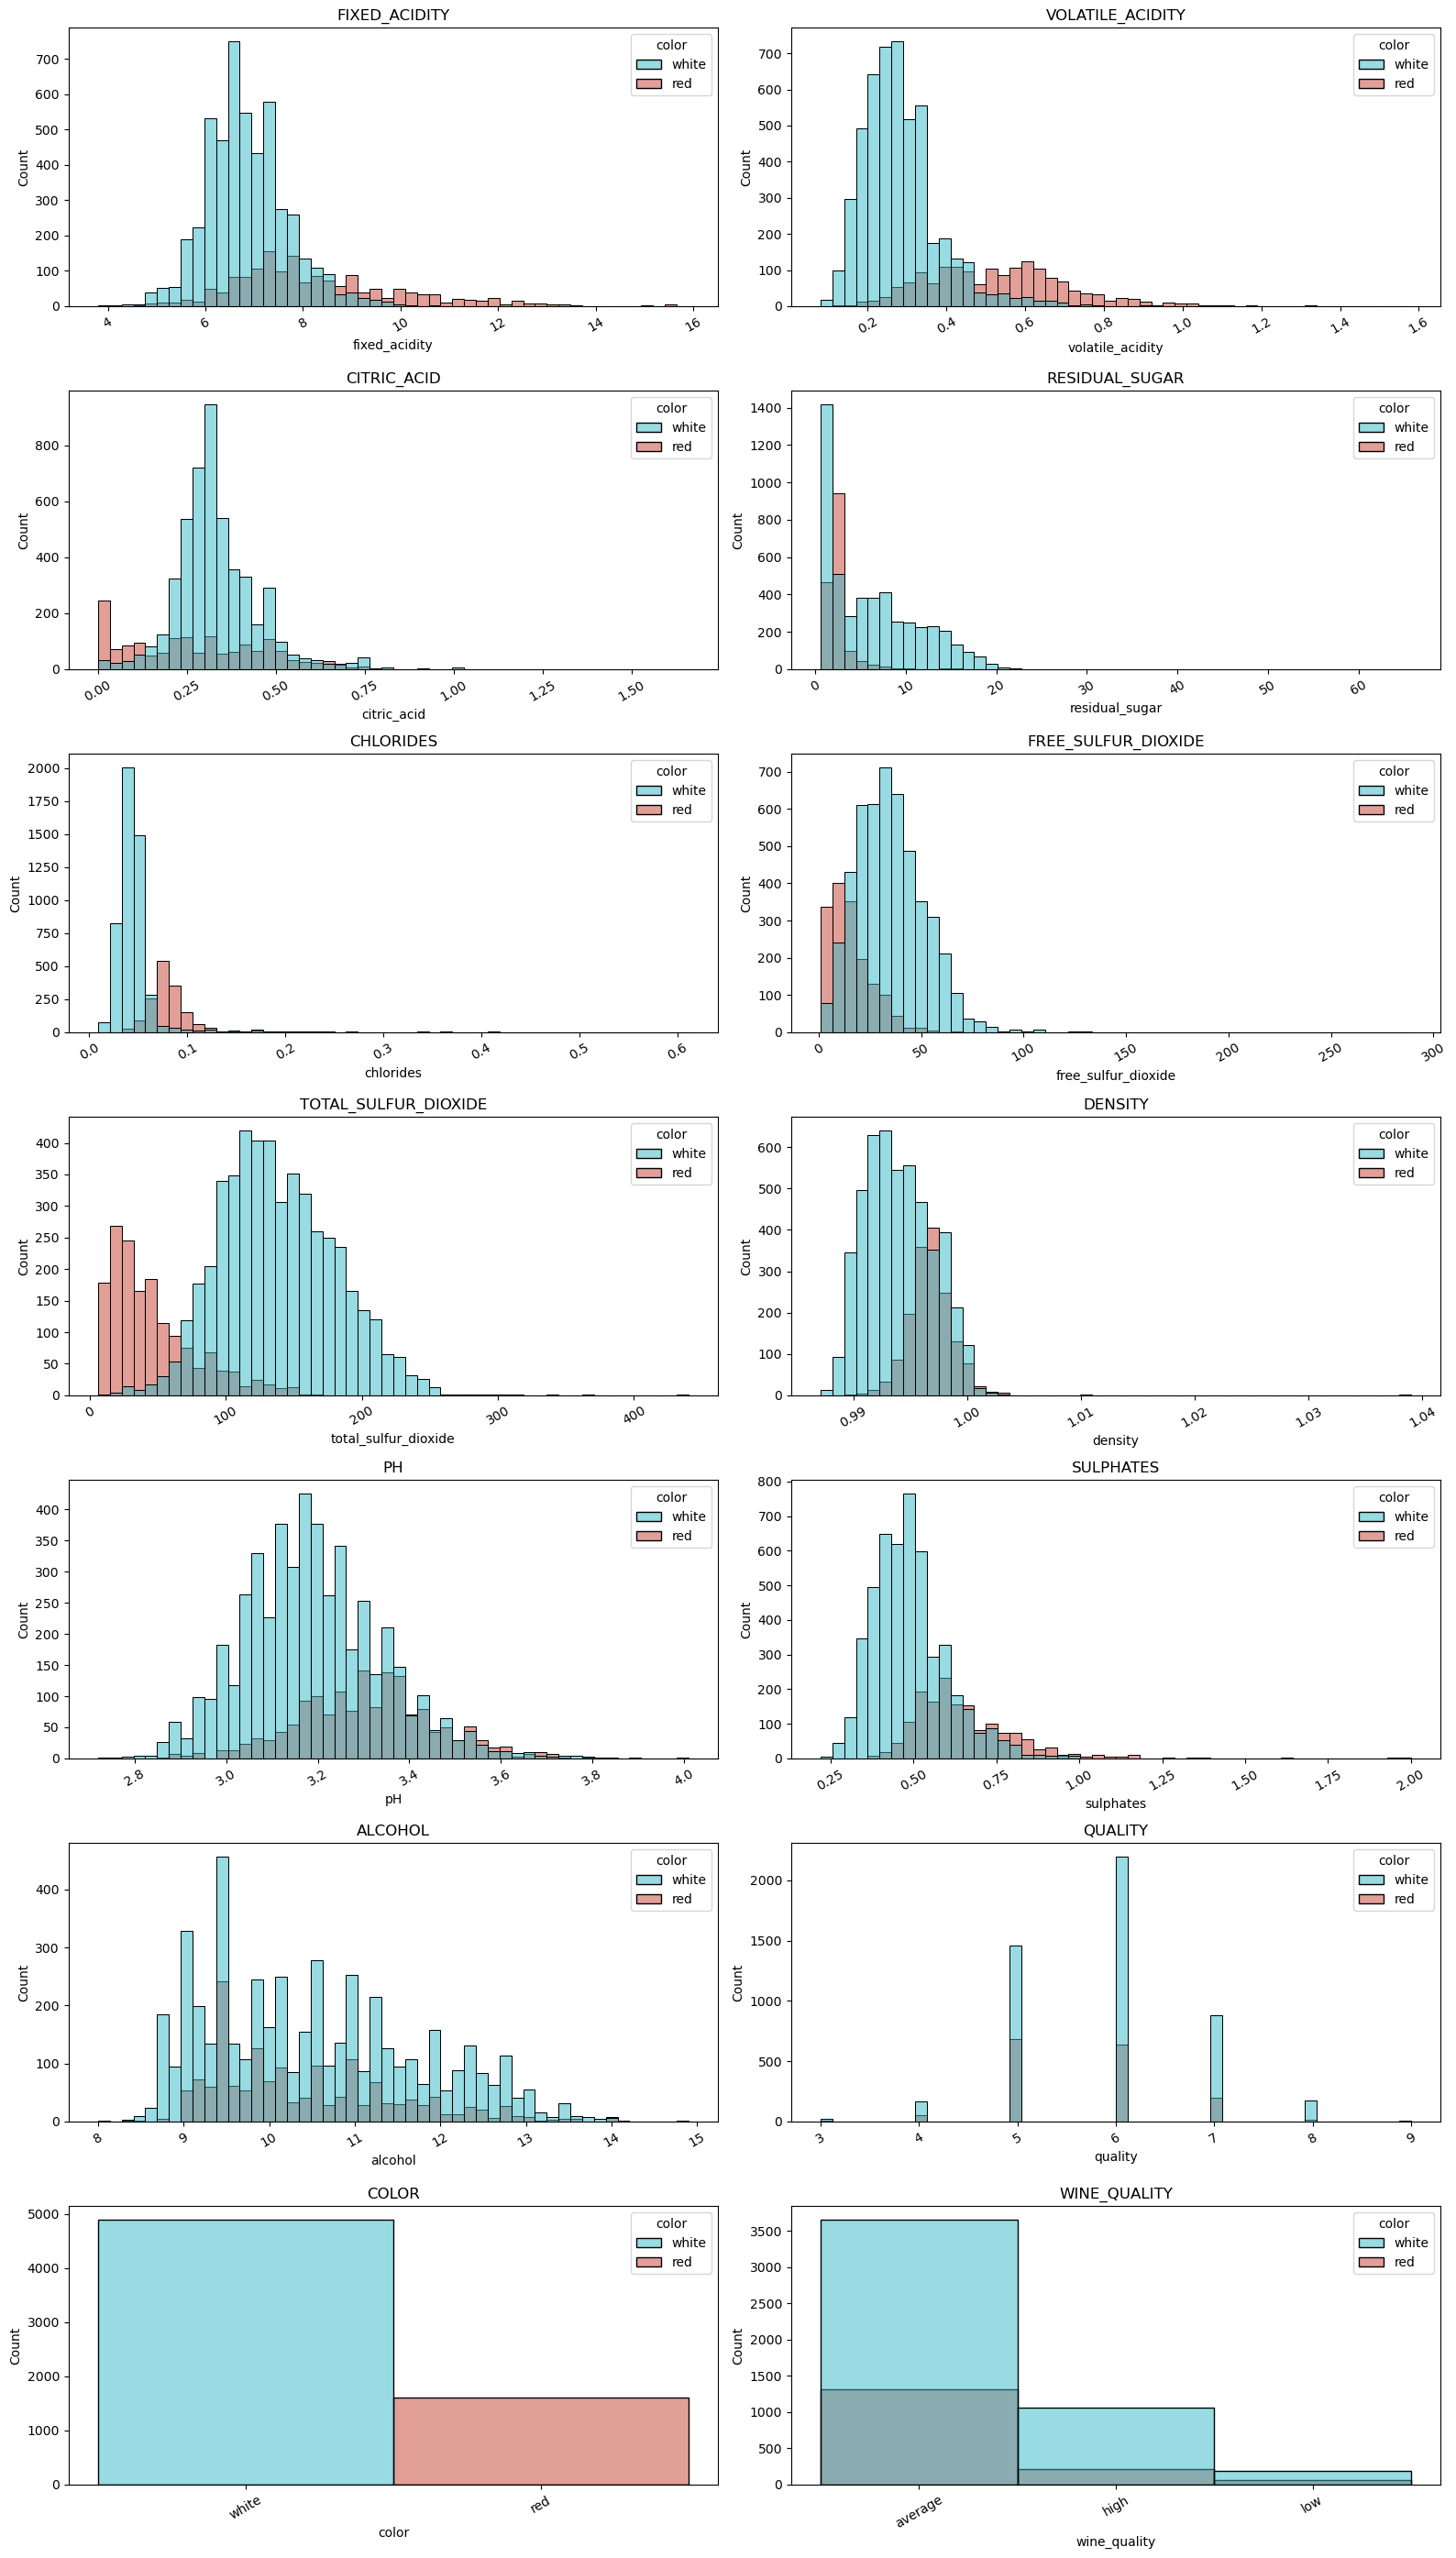

In [11]:
# Determine the number of rows needed for subplots
n_rows = len(cols) // 2 + len(cols) % 2
fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows*4))

for i, col in enumerate(cols):
    ax = axes.flatten()[i]
    # Use seaborn for a more refined look with hue based on 'color'
    sns.histplot(df, x=col, hue='color', bins=50, ax=ax, palette=custom_palette)  # 'viridis' is an example palette, you can change it
    ax.set_title(col.upper(), fontsize=12)  # Set title for each subplot
    ax.tick_params(axis='x', rotation=30)   # Rotate x-axis labels
    ax.grid(False)  # Hide gridlines

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [12]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1                7.0              0.27         0.36            20.7   
w-2                6.3              0.30         0.34             1.6   
w-3                8.1              0.28         0.40             6.9   
w-4                7.2              0.23         0.32             8.5   
w-5                7.2              0.23         0.32             8.5   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
w-1          0.045                 45.0                 170.0   1.0010  3.00   
w-2          0.049                 14.0                 132.0   0.9940  3.30   
w-3          0.050                 30.0                  97.0   0.9951  3.26   
w-4          0.058                 47.0                 186.0   0.9956  3.19   
w-5          0.058                 47.0                 186.0   0.9956  3.19   

         sulphates  alcohol  quality  color wine_quality  
wine_id                                                   
w-1           0.45      8.8        6  white      average  
w-2           0.49      9.5        6  white      average  
w-3           0.44     10.1        6  white      average  
w-4           0.40      9.9        6  white      average  
w-5           0.40      9.9        6  white      average

In [13]:
train_scaled, validate_scaled, test_scaled = e.preprocess_wine(df)


    train -> (3898, 15)
    validate -> (1299, 15)
    test -> (1300, 15)


In [14]:
train_scaled.head(15)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-2549        0.165217             0.144         0.42        0.099693   
w-4295        0.260870             0.112         0.28        0.128834   
r-956         0.356522             0.104         0.52        0.019939   
w-1800        0.173913             0.144         0.21        0.099693   
w-3442        0.234783             0.136         0.28        0.009202   
r-1413        0.330435             0.128         0.34        0.069018   
w-3637        0.182609             0.144         0.39        0.012270   
w-451         0.243478             0.416         0.20        0.142638   
w-2454        0.165217             0.096         0.26        0.015337   
w-2314        0.208696             0.192         0.30        0.041411   
r-159         0.234783             0.480         0.00        0.024540   
w-3326        0.208696             0.136         0.28        0.067485   
r-575         0.539130             0.208         0.49        0.039877   
r-1402        0.304348             0.488         0.21        0.023006   
w-4061        0.173913             0.264         0.01        0.084356   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
w-2549    0.055092             0.419244              0.563107  0.160594   
w-4295    0.056761             0.144330              0.319001  0.145942   
r-956     0.130217             0.054983              0.047157  0.180644   
w-1800    0.046745             0.233677              0.432732  0.163678   
w-3442    0.046745             0.206186              0.291262  0.089262   
r-1413    0.083472             0.048110              0.044383  0.198381   
w-3637    0.013356             0.075601              0.166436  0.072874   
w-451     0.096828             0.137457              0.466019  0.192597   
w-2454    0.025042             0.240550              0.374480  0.107384   
w-2314    0.028381             0.096220              0.205270  0.067476   
r-159     0.101836             0.075601              0.044383  0.188741   
w-3326    0.038397             0.281787              0.332871  0.064970   
r-575     0.110184             0.130584              0.199723  0.233083   
r-1402    0.113523             0.219931              0.374480  0.175246   
w-4061    0.060100             0.130584              0.177531  0.125506   

               pH  sulphates   alcohol   quality  white  high  low  
wine_id                                                             
w-2549   0.362205   0.169492  0.217391  0.500000    1.0   0.0  0.0  
w-4295   0.283465   0.180791  0.405797  0.333333    1.0   0.0  0.0  
r-956    0.488189   0.248588  0.347826  0.333333    0.0   0.0  0.0  
w-1800   0.511811   0.197740  0.275362  0.500000    1.0   0.0  0.0  
w-3442   0.346457   0.169492  0.449275  0.333333    1.0   0.0  0.0  
r-1413   0.377953   0.401130  0.420290  0.500000    0.0   0.0  0.0  
w-3637   0.401575   0.293785  0.478261  0.666667    1.0   1.0  0.0  
w-451    0.228346   0.175141  0.159420  0.333333    1.0   0.0  0.0  
w-2454   0.622047   0.186441  0.405797  0.500000    1.0   0.0  0.0  
w-2314   0.464567   0.225989  0.666667  0.666667    1.0   1.0  0.0  
r-159    0.582677   0.152542  0.188406  0.333333    0.0   0.0  0.0  
w-3326   0.299213   0.084746  0.666667  0.666667    1.0   1.0  0.0  
r-575    0.354331   0.265537  0.289855  0.500000    0.0   0.0  0.0  
r-1402   0.401575   0.158192  0.275362  0.333333    0.0   0.0  0.0  
w-4061   0.354331   0.107345  0.289855  0.333333    1.0   0.0  0.0

### Explore!
- 1. Ask your question

- 2. Vizualize it

- 3. Perform a stats test, if needed

- 4. Write your takeaway



Q2. Does the pH differ across density?

In [15]:
# cluster on two features
X1 =train_scaled[['pH','density']]

In [16]:
# use the functions I created above

train_scaled, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_scaled, X1, 2)

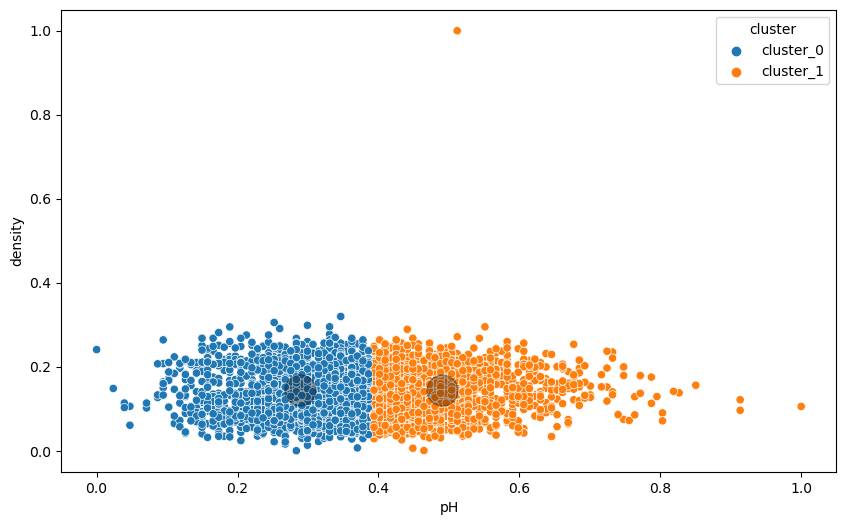

In [17]:
# use the functions I created above to plot the data

e.create_scatter_plot('pH','density',train_scaled,kmeans, X_scaled, scaler)

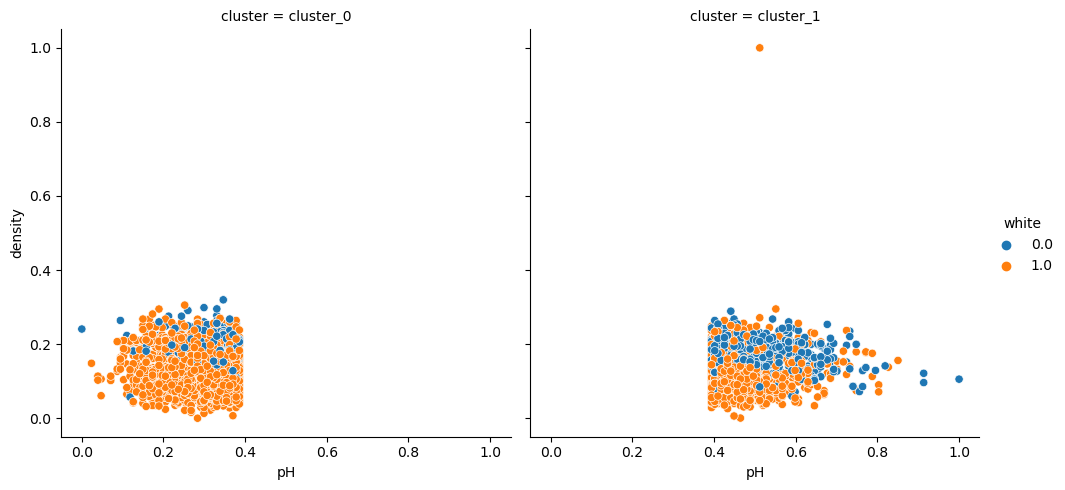

In [18]:
# lets visualize clusters by age and annual income 

sns.relplot(x = 'pH', y = 'density', data = train_scaled, col = 'cluster', hue = 'white')

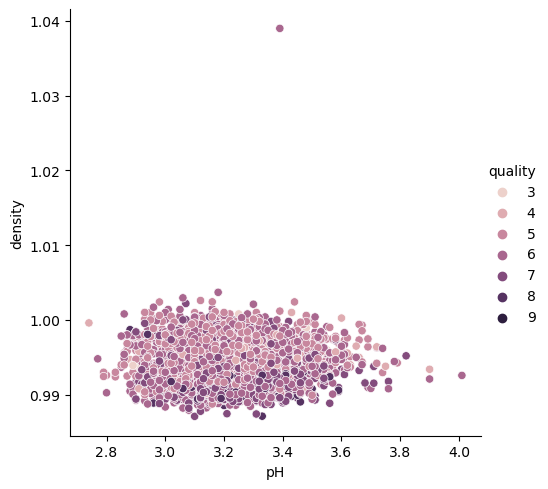

In [19]:
sns.relplot(x = 'pH', y = 'density', data = train, hue = 'quality')

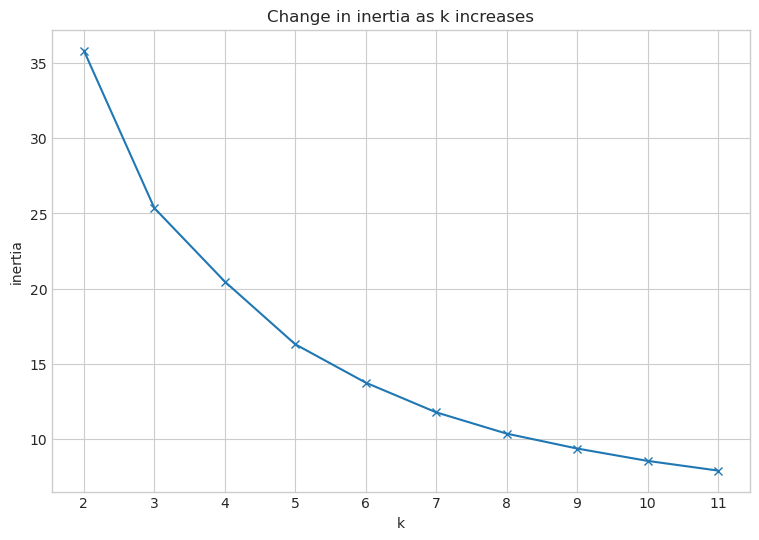

In [20]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '3' or '5' as the best values for k

In [27]:
train_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-2549        0.165217             0.144         0.42        0.099693   
w-4295        0.260870             0.112         0.28        0.128834   
r-956         0.356522             0.104         0.52        0.019939   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
w-2549    0.055092             0.419244              0.563107  0.160594   
w-4295    0.056761             0.144330              0.319001  0.145942   
r-956     0.130217             0.054983              0.047157  0.180644   

               pH  sulphates   alcohol   quality  white  high  low    cluster  
wine_id                                                                        
w-2549   0.362205   0.169492  0.217391  0.500000    1.0   0.0  0.0  cluster_2  
w-4295   0.283465   0.180791  0.405797  0.333333    1.0   0.0  0.0  cluster_1  
r-956    0.488189   0.248588  0.347826  0.333333    0.0   0.0  0.0  cluster_0

In [28]:
# cluster on two features
X2 =train_scaled[['volatile_acidity', 'alcohol']]

In [29]:
# use the functions I created above

train_scaled, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_scaled, X2, 4)

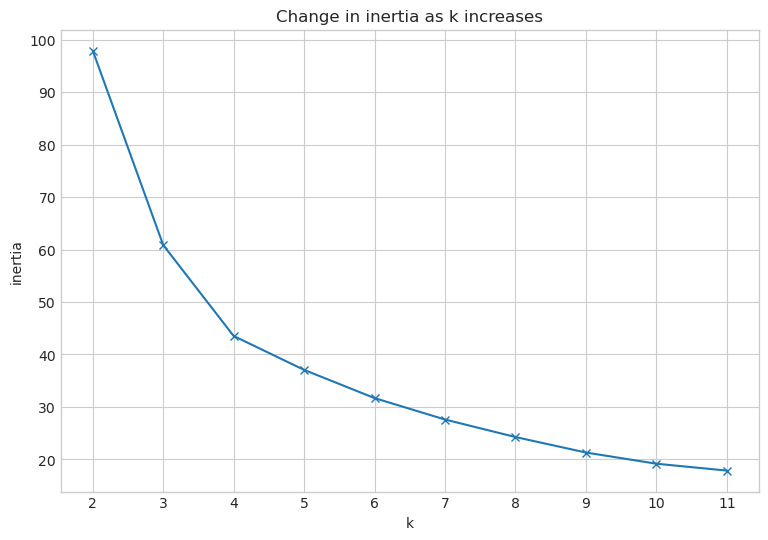

In [30]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '4' as the best values for k

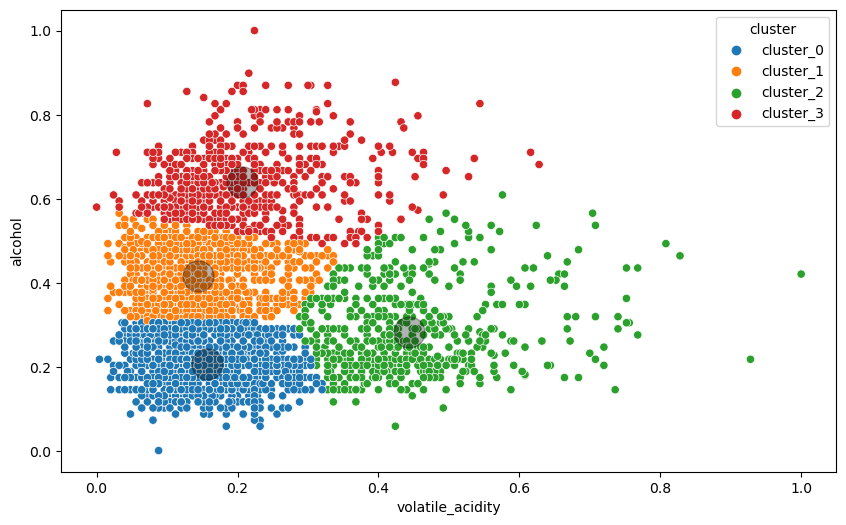

In [31]:
# use the functions I created above to plot the data

e.create_scatter_plot('volatile_acidity', 'alcohol',train_scaled,kmeans, X_scaled, scaler)

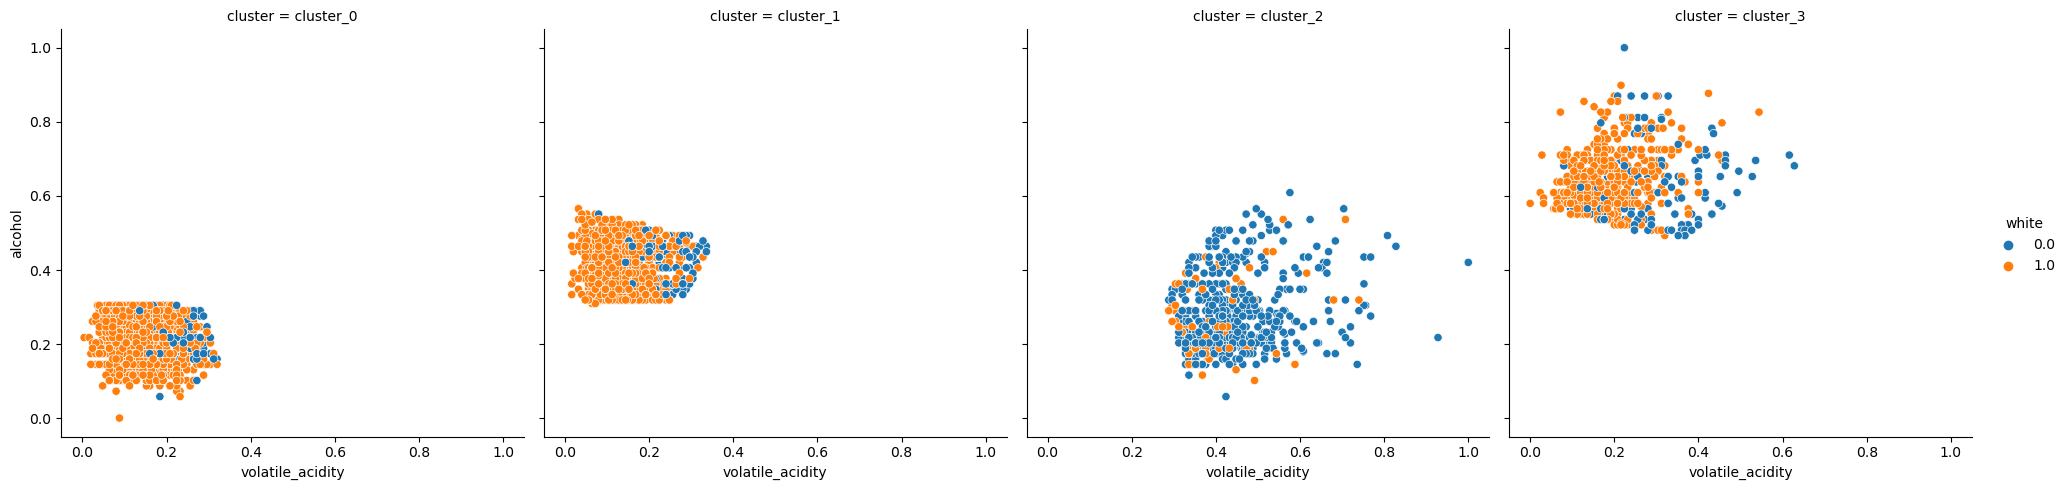

In [32]:
# lets visualize clusters by age and annual income 

sns.relplot(x = 'volatile_acidity', y = 'alcohol', data = train_scaled, col = 'cluster', hue = 'white')

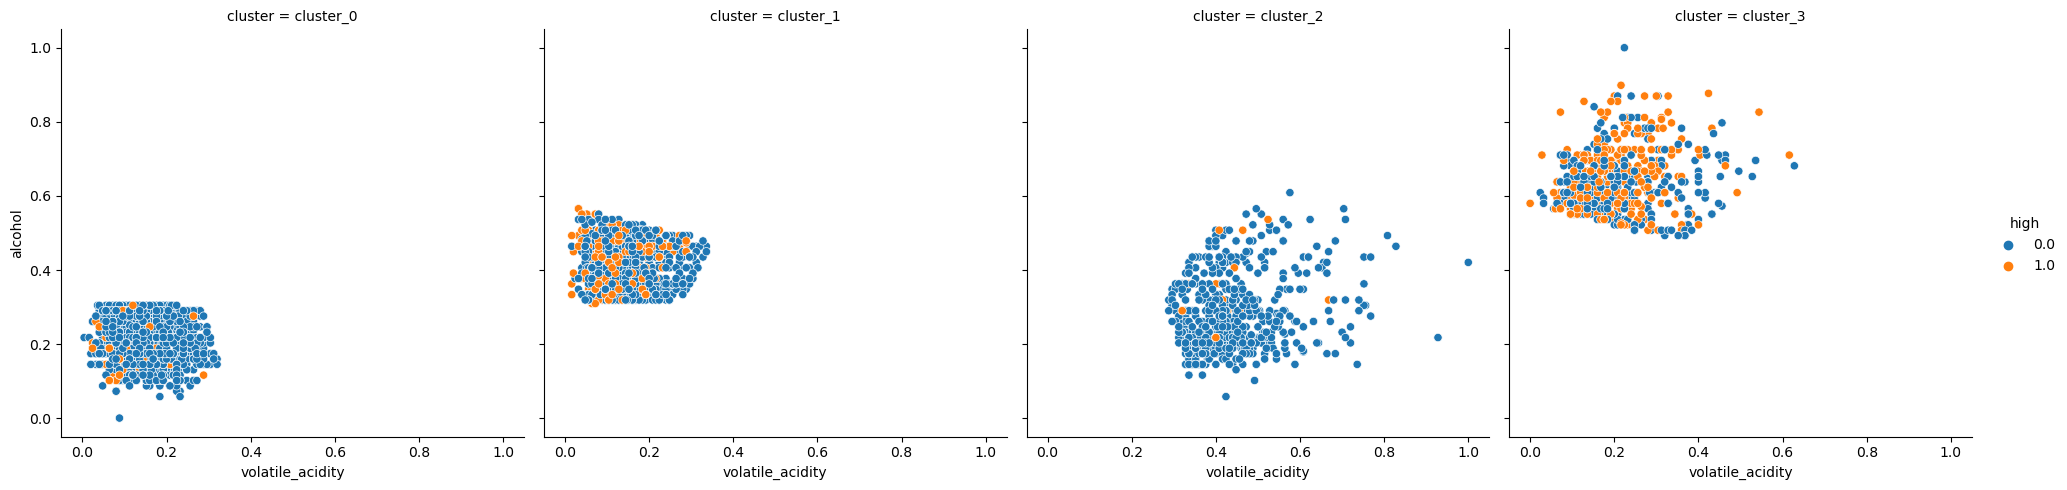

In [33]:
sns.relplot(x = 'volatile_acidity', y = 'alcohol', data = train_scaled, col = 'cluster', hue = 'high')

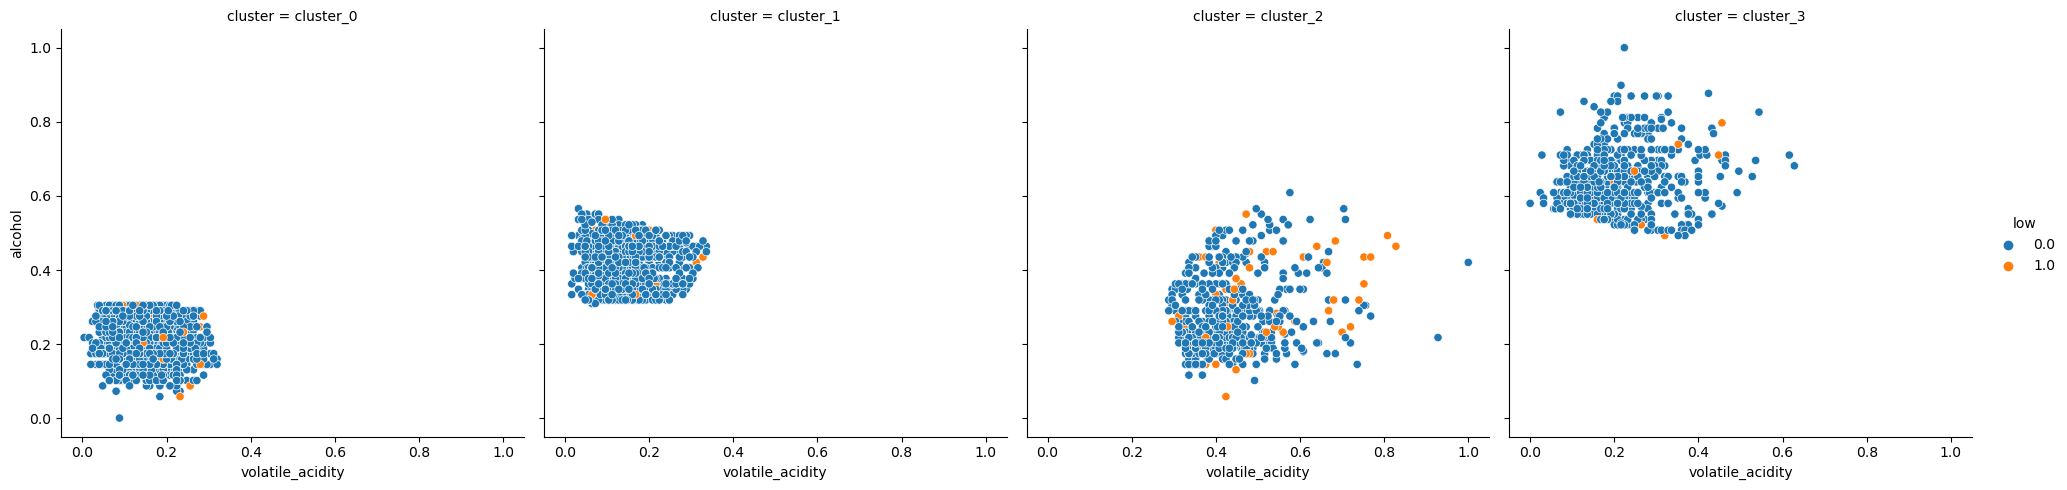

In [34]:
sns.relplot(x = 'volatile_acidity', y = 'alcohol', data = train_scaled, col = 'cluster', hue = 'low')

In [35]:
# cluster on two features
X3 =train_scaled[['volatile_acidity', 'free_sulfur_dioxide']]

In [36]:
# use the functions I created above

train_scaled, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_scaled, X3, 3)

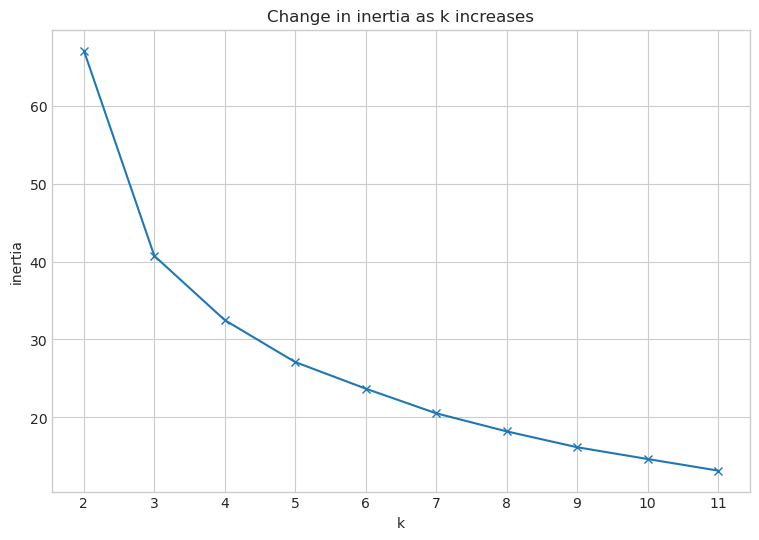

In [37]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '3' as the best values for k

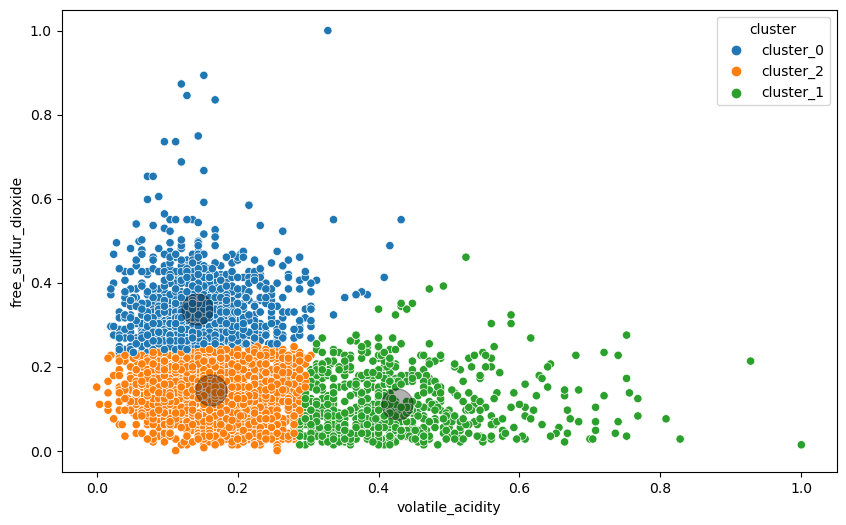

In [38]:
# use the functions I created above to plot the data

e.create_scatter_plot('volatile_acidity', 'free_sulfur_dioxide',train_scaled,kmeans, X_scaled, scaler)

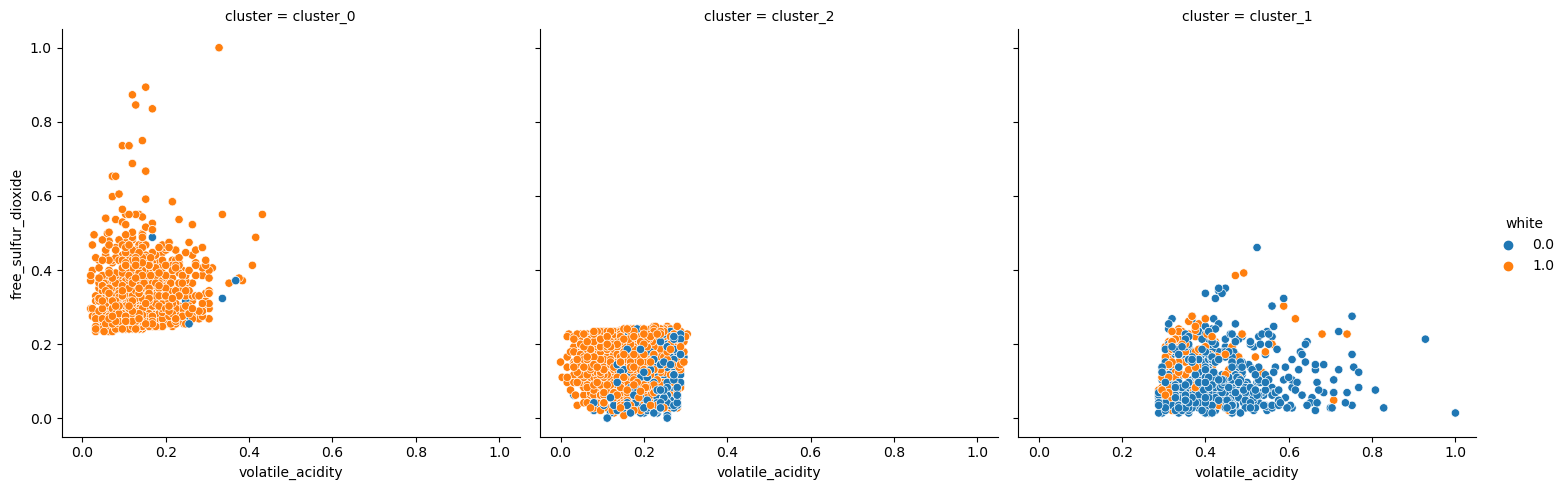

In [39]:
# lets visualize clusters by age and annual income 

sns.relplot(x = 'volatile_acidity', y = 'free_sulfur_dioxide', data = train_scaled, col = 'cluster', hue = 'white')

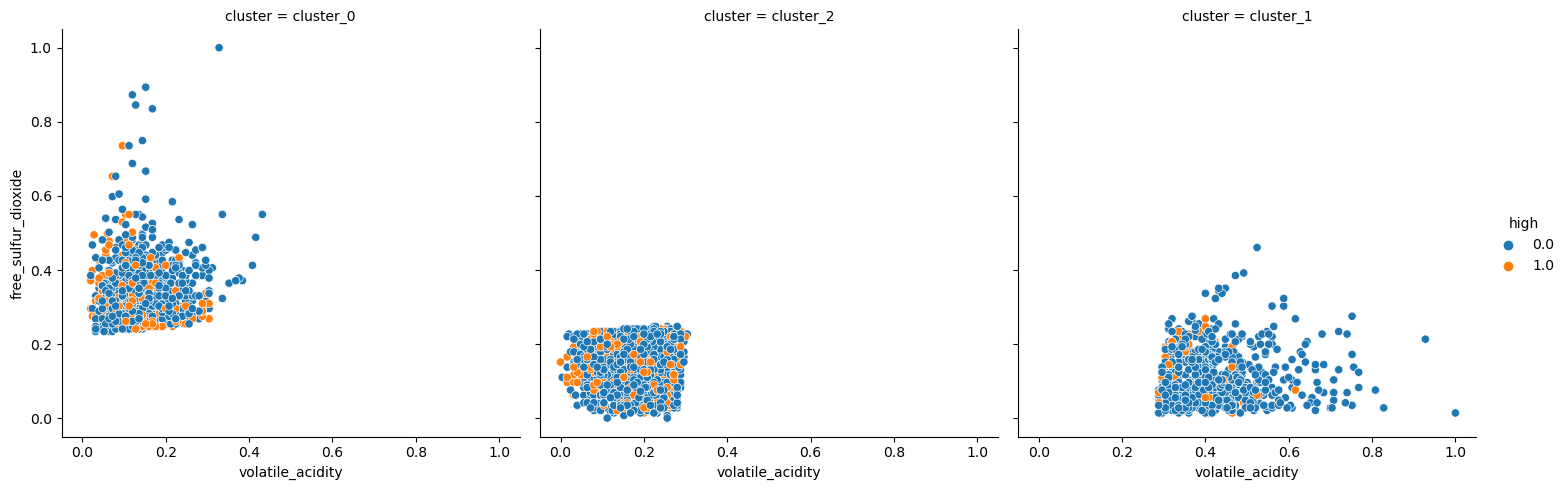

In [40]:
sns.relplot(x = 'volatile_acidity', y = 'free_sulfur_dioxide', data = train_scaled, col = 'cluster', hue = 'high')

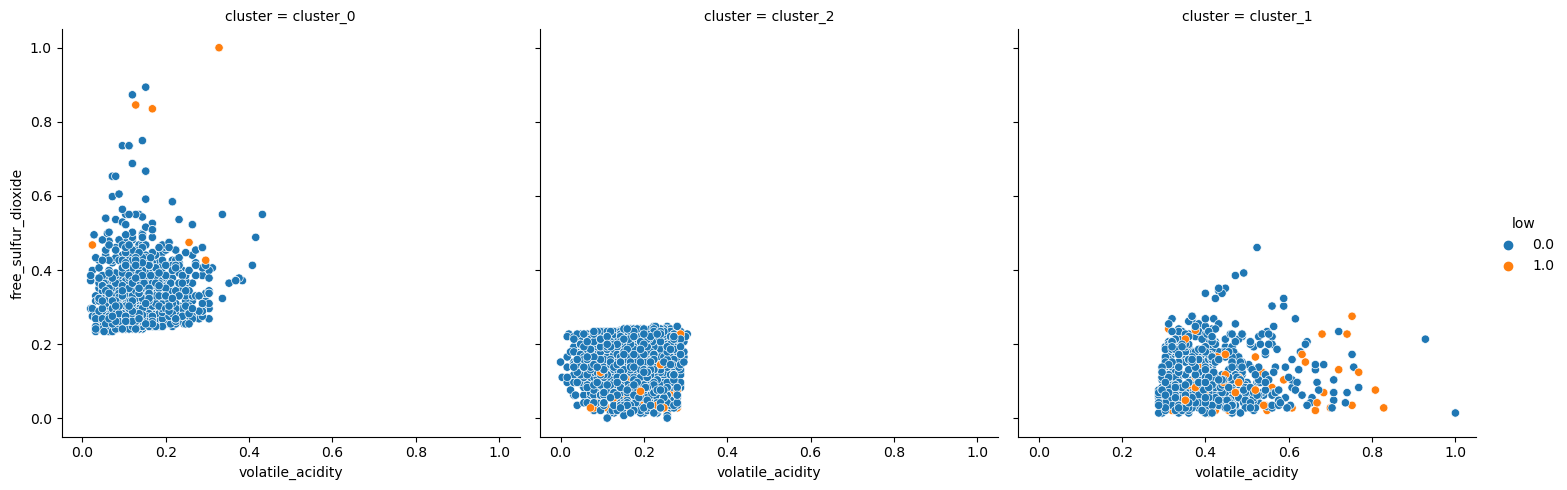

In [41]:
sns.relplot(x = 'volatile_acidity', y = 'free_sulfur_dioxide', data = train_scaled, col = 'cluster', hue = 'low')

In [42]:
# cluster on two features
X3 =train_scaled[['volatile_acidity', 'free_sulfur_dioxide']]

In [43]:
# use the functions I created above

train_scaled, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_scaled, X3, 3)

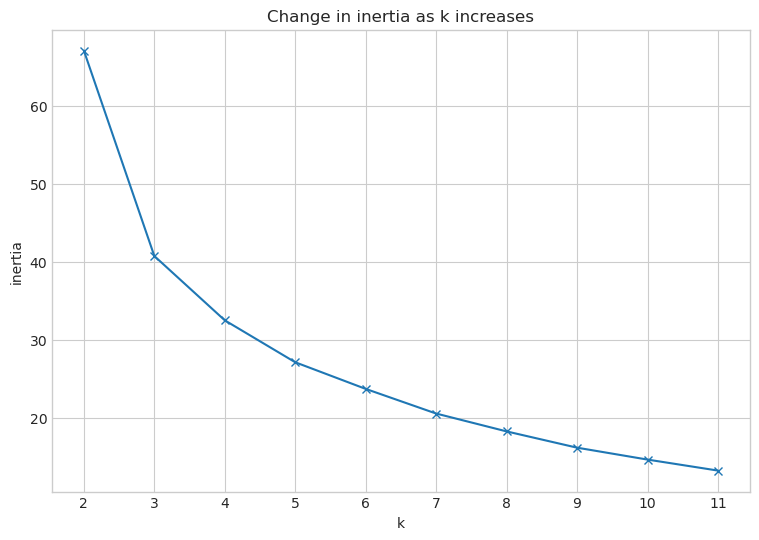

In [44]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '3' as the best values for k

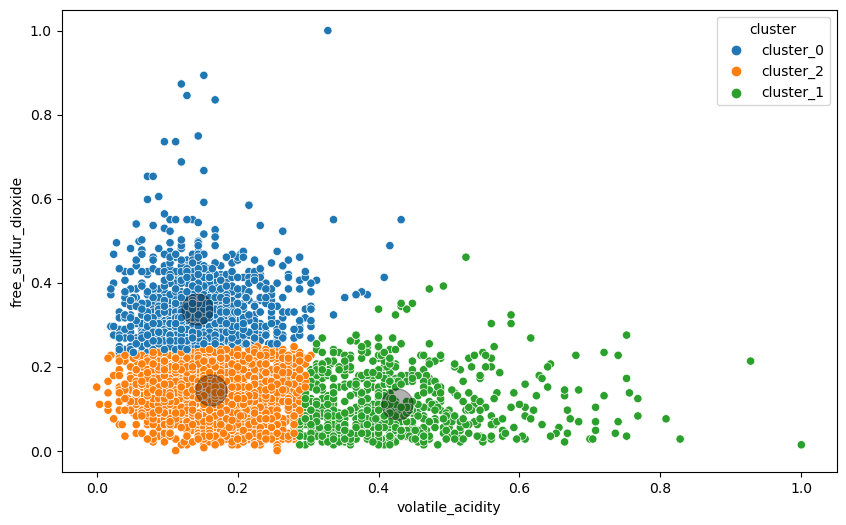

In [45]:
# use the functions I created above to plot the data

e.create_scatter_plot('volatile_acidity', 'free_sulfur_dioxide',train_scaled,kmeans, X_scaled, scaler)

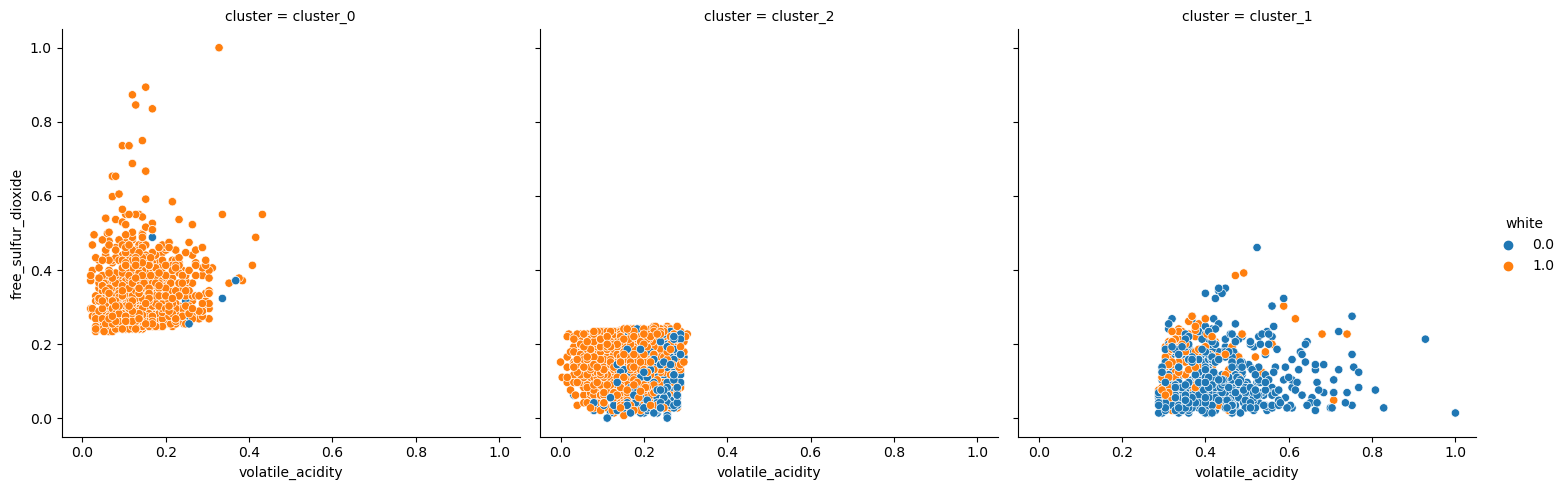

In [46]:
# lets visualize clusters by age and annual income 

sns.relplot(x = 'volatile_acidity', y = 'free_sulfur_dioxide', data = train_scaled, col = 'cluster', hue = 'white')

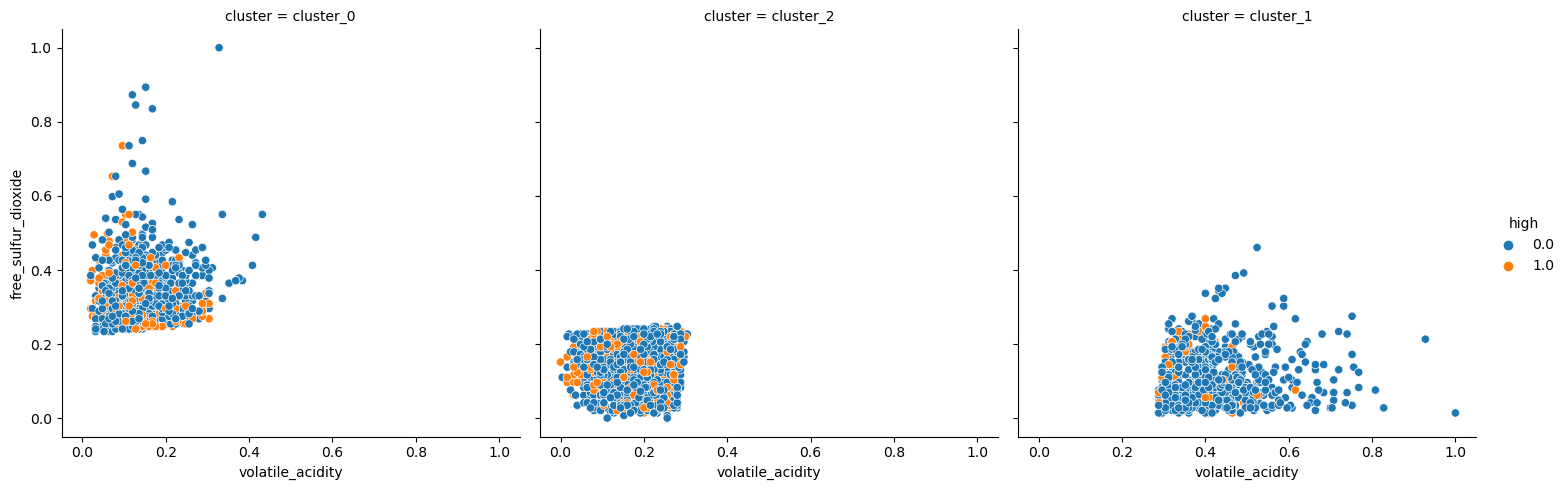

In [47]:
sns.relplot(x = 'volatile_acidity', y = 'free_sulfur_dioxide', data = train_scaled, col = 'cluster', hue = 'high')

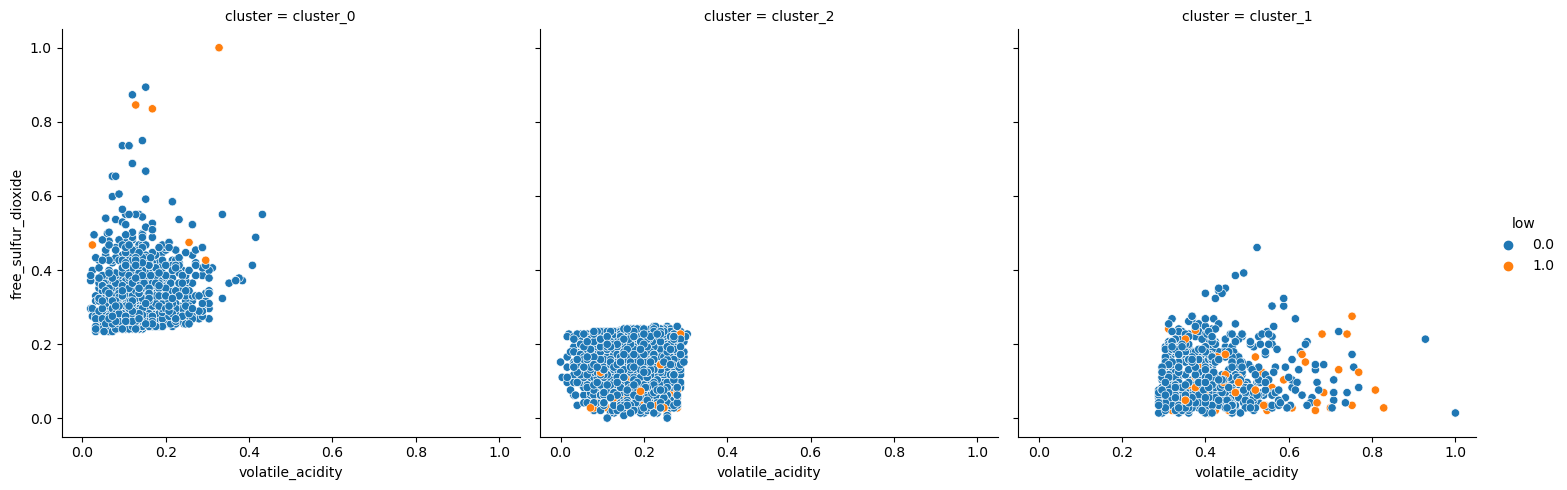

In [48]:
sns.relplot(x = 'volatile_acidity', y = 'free_sulfur_dioxide', data = train_scaled, col = 'cluster', hue = 'low')

In [49]:
# cluster on two features
X4 =train_scaled[['citric_acid', 'total_sulfur_dioxide']]

In [50]:
# use the functions I created above

train_scaled, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_scaled, X4, 5)

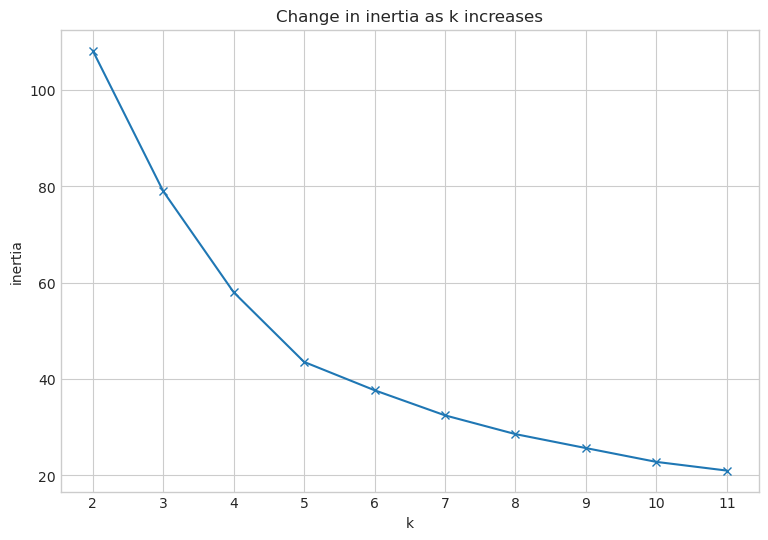

In [51]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '5' as the best values for k

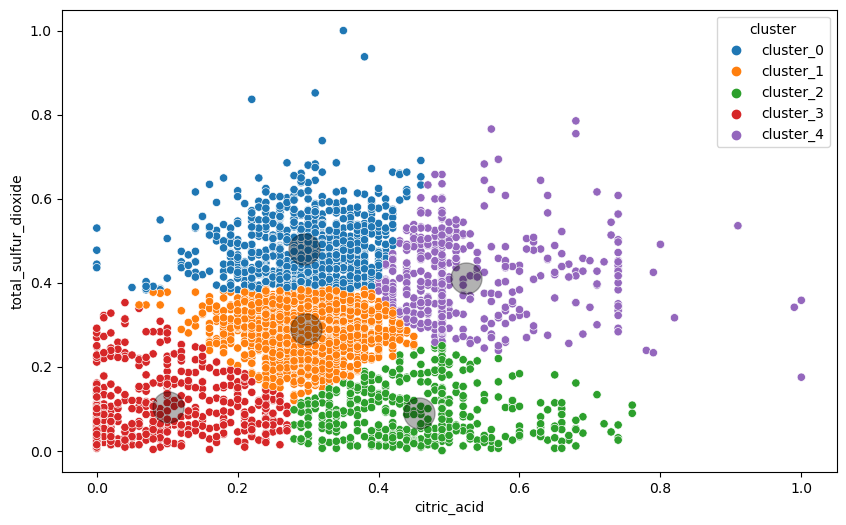

In [52]:
# use the functions I created above to plot the data

e.create_scatter_plot('citric_acid', 'total_sulfur_dioxide',train_scaled,kmeans, X_scaled, scaler)

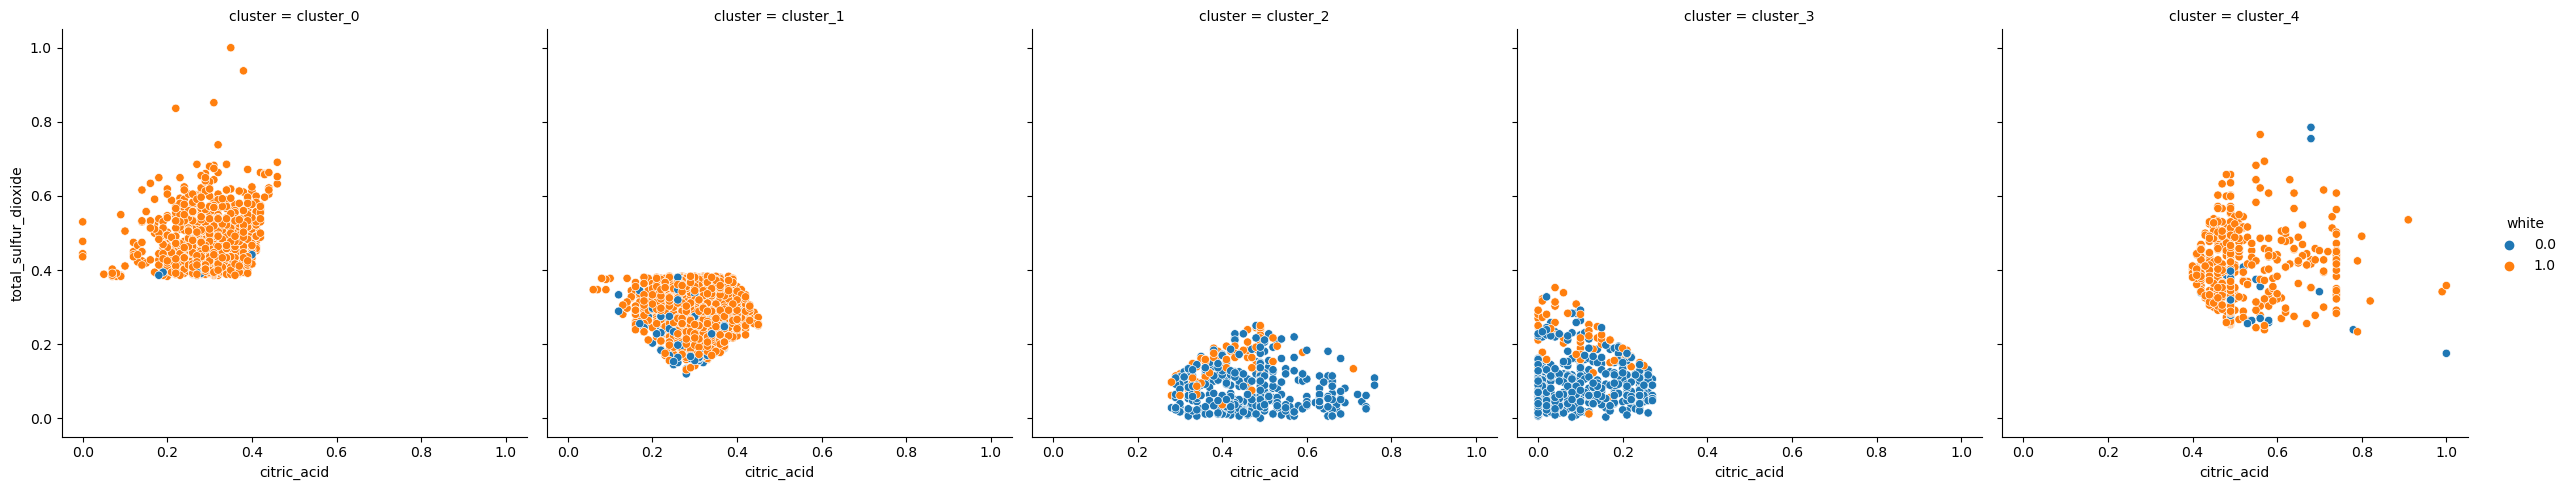

In [53]:
# lets visualize clusters by age and annual income 

sns.relplot(x = 'citric_acid', y = 'total_sulfur_dioxide', data = train_scaled, col = 'cluster', hue = 'white')

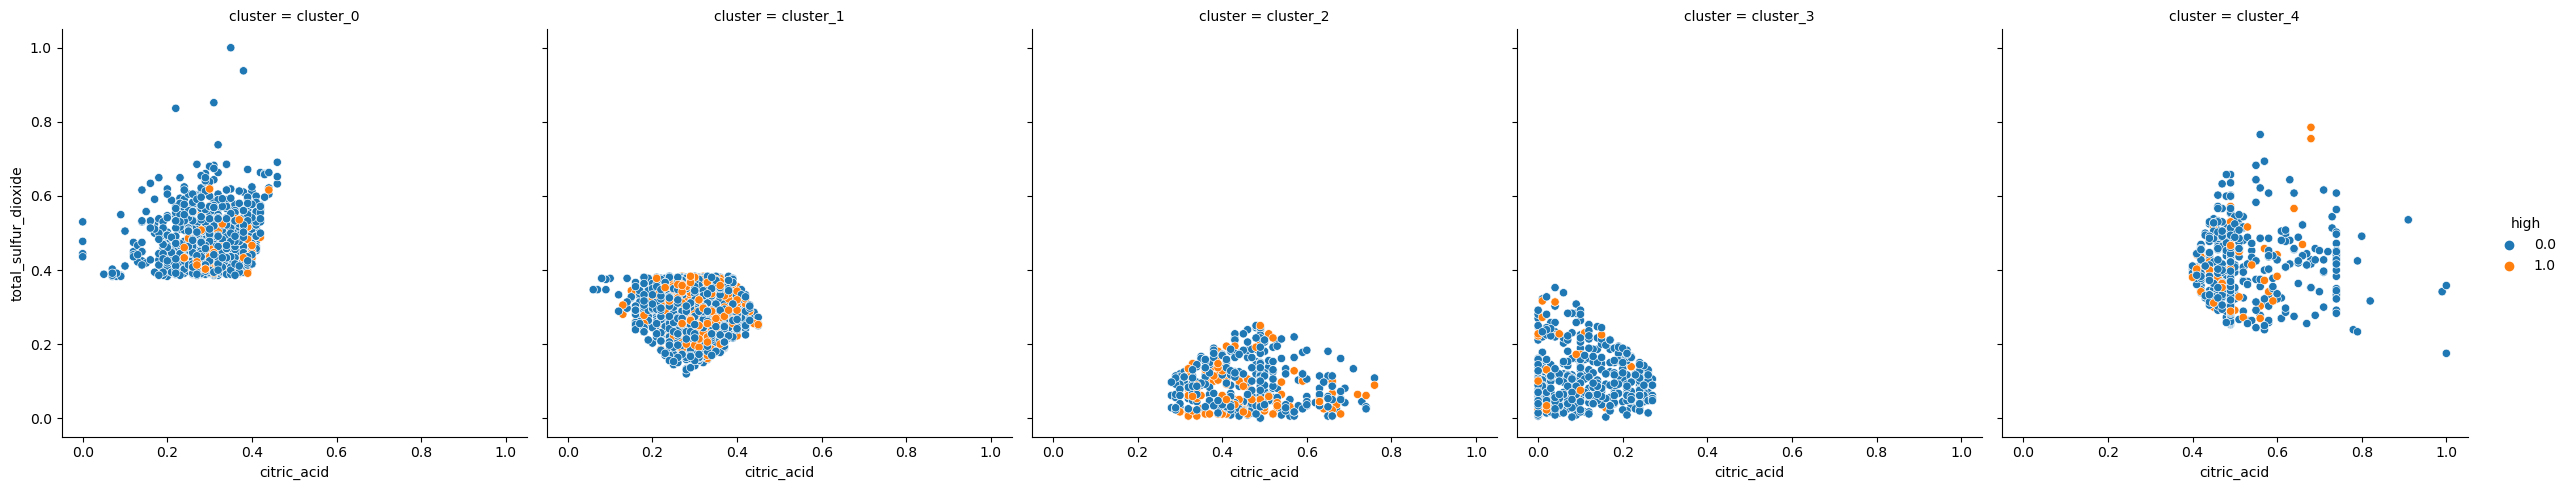

In [54]:
sns.relplot(x = 'citric_acid', y = 'total_sulfur_dioxide', data = train_scaled, col = 'cluster', hue = 'high')

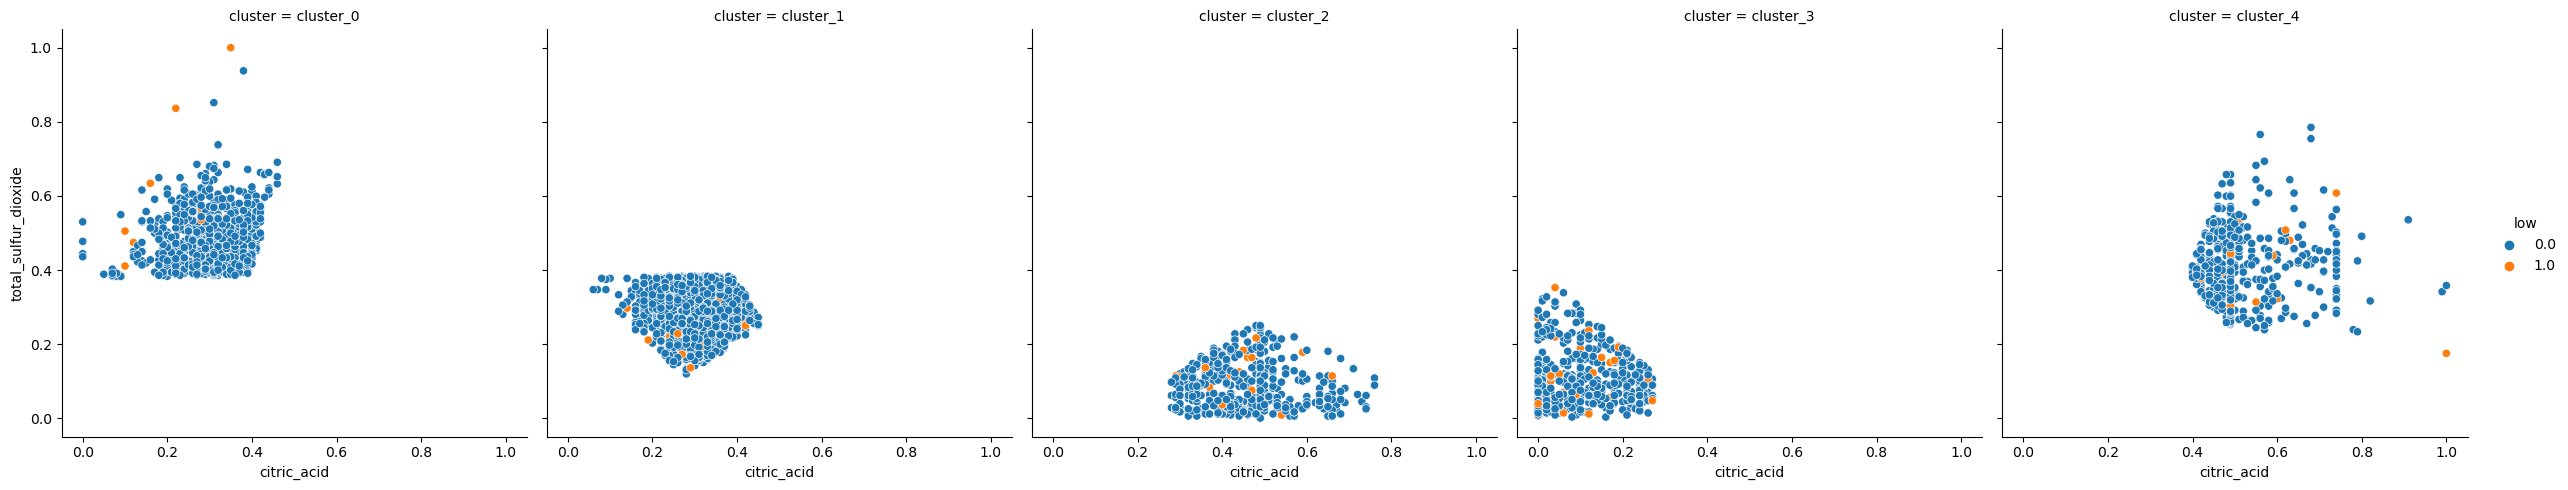

In [55]:
sns.relplot(x = 'citric_acid', y = 'total_sulfur_dioxide', data = train_scaled, col = 'cluster', hue = 'low')